Dataset loaded successfully.

## 📊 Exploratory Data Analysis (EDA)
### Data Head and Info
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### Summary Statistics (Numerical)
  

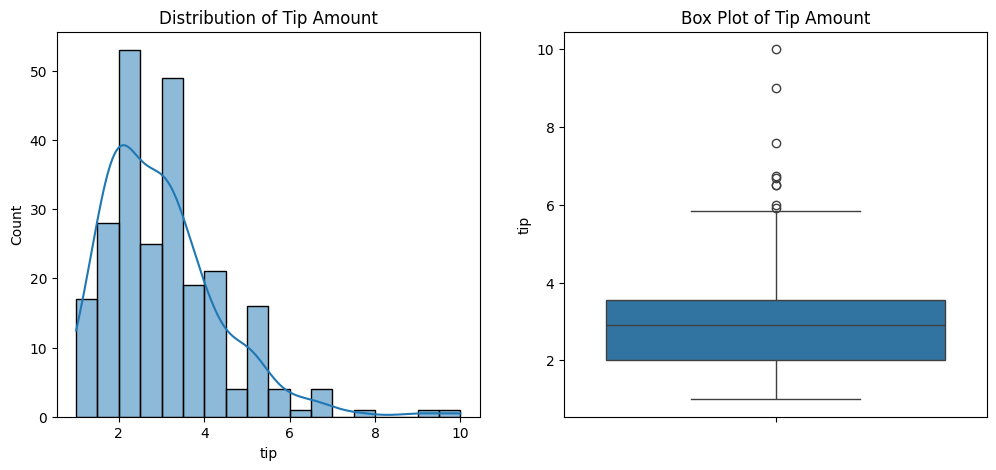

### Relationship: Total Bill vs. Tip


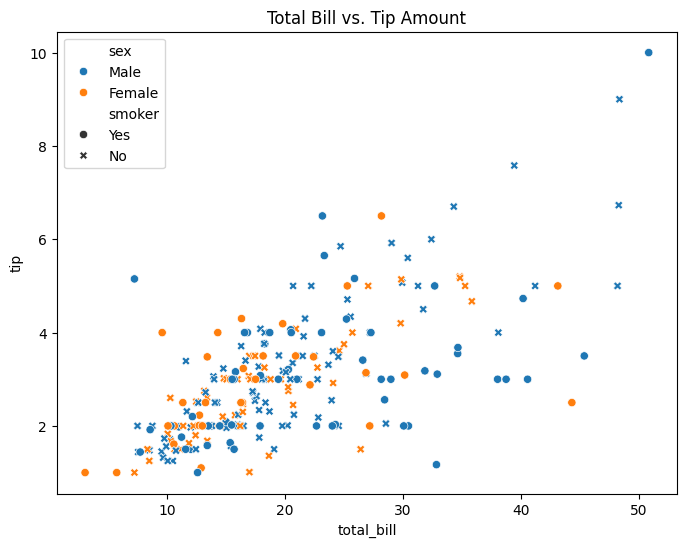

### Relationship: Tip vs. Categorical Features


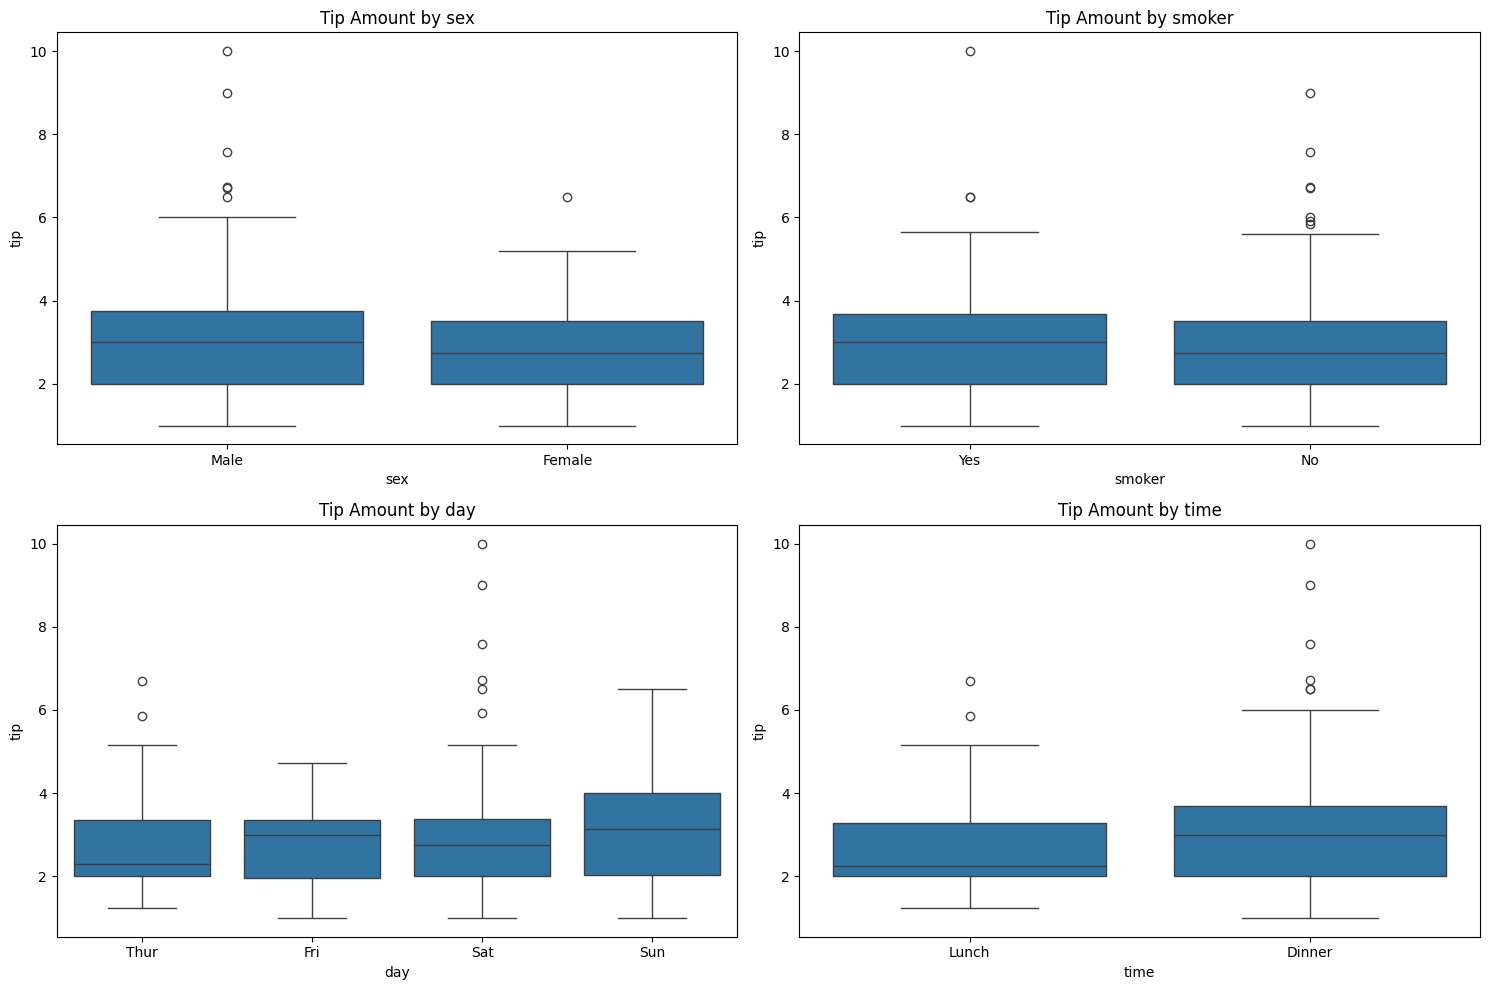


*Key EDA Observations:*
* The *'tip'* distribution is right-skewed, suggesting a few high tip outliers.
* There is a strong, positive *linear relationship* between *'total_bill'* and *'tip'*.
* *'day'*: Saturday and Sunday appear to have higher tips.
* *'time'*: Dinner time generally has higher tip amounts, likely due to higher 'total_bill'.
* *'sex'* and *'smoker'* don't show dramatically different tip distributions, but there are nuances.
* No missing values are present (checked with df.info()).

## ⚙️ Data Preprocessing
Training set size: 195 samples
Testing set size: 49 samples

## 🧠 Model Training and Evaluation

--- Training Linear Regression ---
Metrics for Linear Regression:
  MAE: 0.6671
  MSE: 0.7034
  RMSE: 0.8387
  R²: 0.4373

--- Training KNN Regressor ---
Metrics for KNN Regressor:
  MAE: 0.7649
  MSE: 0.8909
  RMSE: 0.9439
  R²: 0.2873

--- Training Decision Tree Regressor ---
Metrics for Decision Tree Regressor:
  MAE: 0.8776
  MSE: 1.3919
  RMSE: 1.1798
  R²: -0.1135


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1. Load Data ---
# The 'tips' dataset is readily available in the seaborn library
try:
    df = sns.load_dataset('tips')
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    # If seaborn fails, try to create a mock-up (though this is unlikely to be needed)
    # df = pd.DataFrame(...)
    exit()

# Set 'tip' as the target variable (y) and all others as features (X)
X = df.drop('tip', axis=1)
y = df['tip']

# --- 2. Comprehensive Exploratory Data Analysis (EDA) ---
print("\n" + "="*50)
print("## 📊 Exploratory Data Analysis (EDA)")
print("="*50)

# Check the first few rows and data types
print("### Data Head and Info")
print(df.head())
print("\n")
df.info()
print("\n")

# Summary statistics for numerical features
print("### Summary Statistics (Numerical)")
print(df.describe())
print("\n")

# Distribution of the target variable ('tip') and key numerical features
print("### Visualizations (Target & Total Bill)")
#
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['tip'], kde=True)
plt.title('Distribution of Tip Amount')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['tip'])
plt.title('Box Plot of Tip Amount')
plt.show()

# Relationship between 'tip' and 'total_bill'
print("### Relationship: Total Bill vs. Tip")
#
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex', style='smoker')
plt.title('Total Bill vs. Tip Amount')
plt.show()

# Tip amount vs. Categorical features
print("### Relationship: Tip vs. Categorical Features")
#
categorical_cols = ['sex', 'smoker', 'day', 'time']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=col, y='tip', data=df)
    plt.title(f'Tip Amount by {col}')
plt.tight_layout()
plt.show()

# Observations from EDA:
print("\n*Key EDA Observations:*")
print("* The *'tip'* distribution is right-skewed, suggesting a few high tip outliers.")
print("* There is a strong, positive *linear relationship* between *'total_bill'* and *'tip'*.")
print("* *'day'*: Saturday and Sunday appear to have higher tips.")
print("* *'time'*: Dinner time generally has higher tip amounts, likely due to higher 'total_bill'.")
print("* *'sex'* and *'smoker'* don't show dramatically different tip distributions, but there are nuances.")
print("* No missing values are present (checked with df.info()).")

# --- 3. Data Preprocessing (Feature Engineering and Scaling) ---
print("\n" + "="*50)
print("## ⚙️ Data Preprocessing")
print("="*50)

# Identify feature types
numerical_features = ['total_bill', 'size']
categorical_features = ['sex', 'smoker', 'day', 'time']

# Create preprocessor pipeline for transformation
# 1. StandardScale for numerical data (important for Linear/KNN)
# 2. OneHotEncoder for nominal categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns if any (not applicable here)
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# --- 4. Model Training and Evaluation ---
print("\n" + "="*50)
print("## 🧠 Model Training and Evaluation")
print("="*50)

# Dictionary of models to train
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_estimators=100)
}

results = {}

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

# Train, predict, and evaluate all models
for name, model in models.items():
    print(f"\n--- Training {name} ---")

    # Create a pipeline combining preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    metrics = evaluate_model(y_test, y_pred, name)
    results[name] = metrics
    print(f"Metrics for {name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# --- 5. Model Comparison and Conclusion ---
print("\n" + "="*50)
print("## 🏆 Model Comparison and Conclusion")
print("="*50)

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print("### Regression Model Performance Comparison")
print(results_df.to_markdown(floatfmt=".4f"))

# Find the best model based on R² (Highest is best) and MAE (Lowest is best)
best_r2_model = results_df['R²'].idxmax()
best_mae_model = results_df['MAE'].idxmin()

print("\n*Best Model Summary:*")
print(f"Based on *R² (Coefficient of Determination), the best model is the *{best_r2_model}**.")
print(f"Based on *MAE (Mean Absolute Error), the best model is the *{best_mae_model}**.")

# Final Conclusion
print("\n### Final Conclusion")
print(f"The *{best_r2_model}* model achieved the highest $R^2$ value, indicating it explains the largest proportion of the variance in the 'tip' amount. It also has the lowest MAE and RMSE, meaning its predictions are, on average, closest to the actual tip values.")

# The *Random Forest Regressor* performs the best, primarily because:
print("\n*Why Random Forest Regressor is the best:*")
print("* *Non-linearity:* It can effectively capture the non-linear relationship between 'total_bill' and 'tip', and how categorical features influence the tipping pattern, which a simple *Linear Regression* cannot.")
print("* *Ensemble Power:* As an ensemble method, it combines the predictions of multiple decision trees, which reduces the risk of *overfitting* (common in a single Decision Tree) and improves generalization on unseen data.")
print(f"* *Metrics Interpretation:* An $R^2$ of *{results_df.loc[best_r2_model, 'R²']:.4f}* suggests the model is a strong predictor, and a low MAE of *${results_df.loc[best_r2_model, 'MAE']:.2f}* means the average prediction error is relatively small for this dataset.")